### Desafíos 

Para profundizar su comprensión sobre cómo los diferentes parámetros y configuraciones afectan el rendimiento del modelo, complete los siguientes desafíos:

#### Desafío 1: Cambiar la Tasa de Aprendizaje del Optimizador Adam

El optimizador Adam tiene una tasa de aprendizaje por defecto de 0.001. Intente cambiar esta tasa de aprendizaje a diferentes valores y observe cómo afecta el rendimiento del modelo.

1. Cambie la tasa de aprendizaje a 0.01:
 

2. Cambie la tasa de aprendizaje a 0.0001:

**Pregunta:**
- ¿Cómo afecta cada cambio en la tasa de aprendizaje a la precisión y la pérdida del modelo durante el entrenamiento y la validación?

#### Desafío 2: Modificar el Número de Neuronas en las Capas Ocultas

 Intente cambiar el numero de neuronas del modelo acutual y observe cómo afecta el rendimiento del modelo.

1. Cambie el número de neuronas a 256 en cada capa oculta:
 
2. Cambie el número de neuronas a 1024 en cada capa oculta:

**Pregunta:**
- ¿Cómo cambia la precisión y la pérdida del modelo con diferentes números de neuronas en las capas ocultas?

#### Desafío 3: Cambiar la Cantidad de Épocas de Entrenamiento

El modelo actual se entrena durante 20 épocas. Intente cambiar el número de épocas de entrenamiento y observe cómo afecta el rendimiento del modelo.

1. Cambie el número de épocas a 10:


2. Cambie el número de épocas a 30:
 
**Pregunta:**
- ¿Cómo afecta el número de épocas a la precisión y la pérdida del modelo durante el entrenamiento y la validación? ¿Observa algún signo de sobreajuste o subajuste?

#### Desafío 4: Modificar la Función de Activación en las Capas Ocultas

El modelo actual utiliza la función de activación ReLU en las capas ocultas. Intente usar una función de activación diferente y observe cómo afecta el rendimiento del modelo.

1. Cambie la función de activación a `sigmoid`:


2. Cambie la función de activación a `tanh`:


**Pregunta:**
- ¿Cómo afectan las diferentes funciones de activación en las capas ocultas a la precisión y la pérdida del modelo durante el entrenamiento y la validación?



# Desafio 1

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.regularizers import l2
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

In [4]:
# Configuración para mostrar gráficos en Jupyter Notebook
%matplotlib inline

In [5]:
# Cargar el conjunto de datos Iris
data = load_iris()
X = data.data
y = data.target
y = to_categorical(y)

In [6]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Configuración y Entrenamiento con tasa de aprendizaje 0.01

In [7]:
# Crear el modelo MLP con Dropout + Regularización L2
model_lr_01 = Sequential()
model_lr_01.add(Dense(10, input_dim=4, activation='relu', kernel_regularizer=l2(0.01)))
model_lr_01.add(Dropout(0.5))
model_lr_01.add(Dense(10, activation='relu', kernel_regularizer=l2(0.01)))
model_lr_01.add(Dropout(0.5))
model_lr_01.add(Dense(10, activation='relu', kernel_regularizer=l2(0.01)))
model_lr_01.add(Dropout(0.5))
model_lr_01.add(Dense(3, activation='softmax'))

C:\Users\bverg\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
# Compilar el modelo con tasa de aprendizaje 0.01
optimizer_01 = Adam(learning_rate=0.01)
model_lr_01.compile(optimizer=optimizer_01, loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
# Entrenar el modelo
history_lr_01 = model_lr_01.fit(X_train, y_train, epochs=50, batch_size=5, validation_split=0.1)

Epoch 1/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4617 - loss: 0.9011 - val_accuracy: 0.5833 - val_loss: 0.8320
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5303 - loss: 0.9154 - val_accuracy: 0.5833 - val_loss: 0.8171
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3760 - loss: 1.0327 - val_accuracy: 0.5833 - val_loss: 0.8368
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5009 - loss: 0.9189 - val_accuracy: 0.5833 - val_loss: 0.8315
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5445 - loss: 0.9153 - val_accuracy: 0.5833 - val_loss: 0.8298
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4917 - loss: 0.8893 - val_accuracy: 0.5833 - val_loss: 0.8215
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5915 - loss: 0.8854 - val_accuracy: 0.5833 - val_loss: 0.8205
Epoch 8/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5172 - loss: 0.9319 - val_accuracy: 0.5833 - val_loss:

In [18]:
# Evaluar el modelo
loss_01, accuracy_01 = model_lr_01.evaluate(X_test, y_test)
print(f'Precisión en el conjunto de prueba (LR 0.01): {accuracy_01 * 100:.2f}%')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6333 - loss: 0.6457
Precisión en el conjunto de prueba (LR 0.01): 63.33%


# Configuración y Entrenamiento con tasa de aprendizaje 0.0001

In [11]:
# Crear el modelo MLP con Dropout + Regularización L2
model_lr_0001 = Sequential()
model_lr_0001.add(Dense(10, input_dim=4, activation='relu', kernel_regularizer=l2(0.01)))
model_lr_0001.add(Dropout(0.5))
model_lr_0001.add(Dense(10, activation='relu', kernel_regularizer=l2(0.01)))
model_lr_0001.add(Dropout(0.5))
model_lr_0001.add(Dense(10, activation='relu', kernel_regularizer=l2(0.01)))
model_lr_0001.add(Dropout(0.5))
model_lr_0001.add(Dense(3, activation='softmax'))

In [19]:
# Compilar el modelo con tasa de aprendizaje 0.0001
optimizer_0001 = Adam(learning_rate=0.0001)
model_lr_0001.compile(optimizer=optimizer_0001, loss='categorical_crossentropy', metrics=['accuracy'])

In [27]:
# Entrenar el modelo
history_lr_0001 = model_lr_0001.fit(X_train, y_train, epochs=50, batch_size=5, validation_split=0.1)

Epoch 1/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4132 - loss: 1.1056 - val_accuracy: 0.7500 - val_loss: 1.0665
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4929 - loss: 1.0974 - val_accuracy: 0.7500 - val_loss: 1.0652
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4725 - loss: 1.0938 - val_accuracy: 0.7500 - val_loss: 1.0645
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4582 - loss: 1.0755 - val_accuracy: 0.8333 - val_loss: 1.0633
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6552 - loss: 0.9973 - val_accuracy: 0.8333 - val_loss: 1.0618
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4945 - loss: 1.1118 - val_accuracy: 0.7500 - val_loss: 1.0611
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5638 - loss: 1.0601 - val_accuracy: 0.8333 - val_loss: 1.0596
Epoch 8/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5214 - loss: 1.0581 - val_accuracy: 0.8333 - val_loss:

In [28]:
# Evaluar el modelo
loss_0001, accuracy_0001 = model_lr_0001.evaluate(X_test, y_test)
print(f'Precisión en el conjunto de prueba (LR 0.0001): {accuracy_0001 * 100:.2f}%')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8667 - loss: 0.9026
Precisión en el conjunto de prueba (LR 0.0001): 86.67%


# Resultados y Conclusiones

Precisión en el conjunto de prueba (LR 0.01): 63.33%

Precisión en el conjunto de prueba (LR 0.0001): 86.67%

¿Cómo afecta cada cambio en la tasa de aprendizaje a la precisión y la pérdida del modelo durante el entrenamiento y la validación?

Cada cambio en la tasa de aprendizaje puede tener un impacto significativo en la precisión y la pérdida del modelo durante el entrenamiento y la validación. Una tasa de aprendizaje baja puede conducir a una convergencia más suave y estable, una tasa de aprendizaje alta puede acelerar el proceso de entrenamiento pero puede ser propensa a la inestabilidad, mientras que una tasa de aprendizaje media puede proporcionar un buen equilibrio entre convergencia rápida y estabilidad.

# Desafio 2

# 256 neuronas

In [29]:
# Crear el modelo MLP con Dropout + Regularización L2 y 256 neuronas en cada capa oculta
model_neurons_256 = Sequential()
model_neurons_256.add(Dense(256, input_dim=4, activation='relu', kernel_regularizer=l2(0.01)))  # Capa oculta 1 con 256 neuronas
model_neurons_256.add(Dropout(0.5))
model_neurons_256.add(Dense(256, activation='relu', kernel_regularizer=l2(0.01)))  # Capa oculta 2 con 256 neuronas
model_neurons_256.add(Dropout(0.5))
model_neurons_256.add(Dense(256, activation='relu', kernel_regularizer=l2(0.01)))  # Capa oculta 3 con 256 neuronas
model_neurons_256.add(Dropout(0.5))
model_neurons_256.add(Dense(3, activation='softmax'))  # Capa de salida

In [30]:
# Compilar el modelo
model_neurons_256.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [31]:
# Entrenar el modelo
history_neurons_256 = model_neurons_256.fit(X_train, y_train, epochs=50, batch_size=5, validation_split=0.1)

Epoch 1/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.3600 - loss: 6.1400 - val_accuracy: 0.5833 - val_loss: 4.7360
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5170 - loss: 4.5982 - val_accuracy: 0.5833 - val_loss: 3.8740
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4910 - loss: 3.9956 - val_accuracy: 0.5833 - val_loss: 3.2694
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6936 - loss: 3.1836 - val_accuracy: 0.5833 - val_loss: 2.9380
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6816 - loss: 2.9439 - val_accuracy: 0.5833 - val_loss: 2.6624
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6636 - loss: 2.6959 - val_accuracy: 0.5833 - val_loss: 2.4944
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7357 - loss: 2.4808 - val_accuracy: 0.7500 - val_loss: 2.3064
Epoch 8/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8259 - loss: 2.1977 - val_accuracy: 0.9167 - val_loss

In [36]:
# Evaluar el modelo con 256 neuronas en cada capa oculta en el conjunto de prueba
loss_neurons_256, accuracy_neurons_256 = model_neurons_256.evaluate(X_test, y_test)
print(f'Precisión en el conjunto de prueba (256 neuronas en cada capa oculta): {accuracy_neurons_256 * 100:.2f}%')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9000 - loss: 0.3914
Precisión en el conjunto de prueba (256 neuronas en cada capa oculta): 90.00%


# 1024 neuronas

In [32]:
# Crear el modelo MLP con Dropout + Regularización L2 y 1024 neuronas en cada capa oculta
model_neurons_1024 = Sequential()
model_neurons_1024.add(Dense(1024, input_dim=4, activation='relu', kernel_regularizer=l2(0.01)))  # Capa oculta 1 con 1024 neuronas
model_neurons_1024.add(Dropout(0.5))
model_neurons_1024.add(Dense(1024, activation='relu', kernel_regularizer=l2(0.01)))  # Capa oculta 2 con 1024 neuronas
model_neurons_1024.add(Dropout(0.5))
model_neurons_1024.add(Dense(1024, activation='relu', kernel_regularizer=l2(0.01)))  # Capa oculta 3 con 1024 neuronas
model_neurons_1024.add(Dropout(0.5))
model_neurons_1024.add(Dense(3, activation='softmax'))  # Capa de salida

In [33]:
# Compilar el modelo
model_neurons_1024.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [34]:
# Entrenar el modelo
history_neurons_1024 = model_neurons_1024.fit(X_train, y_train, epochs=50, batch_size=5, validation_split=0.1)

Epoch 1/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - accuracy: 0.2567 - loss: 18.3665 - val_accuracy: 0.5833 - val_loss: 11.0705
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.5789 - loss: 9.9512 - val_accuracy: 0.5833 - val_loss: 7.2621
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.7739 - loss: 6.5798 - val_accuracy: 0.5833 - val_loss: 5.4089
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.7059 - loss: 5.2734 - val_accuracy: 0.9167 - val_loss: 4.2740
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.8233 - loss: 4.1647 - val_accuracy: 1.0000 - val_loss: 3.4931
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.8516 - loss: 3.4963 - val_accuracy: 1.0000 - val_loss: 2.8919
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.8205 - loss: 2.9825 - val_accuracy: 1.0000 - val_loss: 2.4357
Epoch 8/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.8686 - loss: 2.4251 - val_accuracy: 0.9167 -

In [37]:
# Evaluar el modelo con 1024 neuronas en cada capa oculta en el conjunto de prueba
loss_neurons_1024, accuracy_neurons_1024 = model_neurons_1024.evaluate(X_test, y_test)
print(f'Precisión en el conjunto de prueba (1024 neuronas en cada capa oculta): {accuracy_neurons_1024 * 100:.2f}%')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9667 - loss: 0.3290
Precisión en el conjunto de prueba (1024 neuronas en cada capa oculta): 96.67%


# Resultados y conclusiones

Precisión en el conjunto de prueba (256 neuronas en cada capa oculta): 90.00%

Precisión en el conjunto de prueba (1024 neuronas en cada capa oculta): 96.67%

Esto nos muestra que aumentar el número de neuronas en cada capa oculta, de 256 a 1024, ha mejorado significativamente la precisión del modelo en el conjunto de prueba, alcanzando un impresionante 96.67%.

¿Cómo cambia la precisión y la pérdida del modelo con diferentes números de neuronas en las capas ocultas?

Cambiar el número de neuronas en las capas ocultas de un modelo afecta tanto la precisión como la pérdida durante el entrenamiento y la evaluación. Aumentar el número de neuronas generalmente puede mejorar la capacidad del modelo para capturar patrones complejos en los datos, lo que se traduce en una mejora en la precisión y una disminución en la pérdida. Por otro lado, reducir el número de neuronas puede limitar la capacidad del modelo para aprender representaciones complejas, lo que podría resultar en una disminución de la precisión y un aumento en la pérdida.

# Desafio 3

# Cambiar el número de épocas a 10

In [16]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt


In [17]:
# Configuración para mostrar gráficos en Jupyter Notebook
%matplotlib inline

# Cargar el conjunto de datos Iris
data = load_iris()
X = data.data
y = data.target

# Convertir las etiquetas a formato one-hot encoding
y = to_categorical(y)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:

from tensorflow.keras.regularizers import l2

# Función para crear el modelo
def create_model():
    model = Sequential()
    model.add(Dense(10, input_dim=4, activation='relu', kernel_regularizer=l2(0.01)))  # Regularización L2 en la capa de entrada
    model.add(Dropout(0.5))  # Dropout con tasa del 50%
    model.add(Dense(10, activation='relu', kernel_regularizer=l2(0.01)))  # Regularización L2 en la capa oculta
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='relu', kernel_regularizer=l2(0.01)))  # Regularización L2 en la capa oculta
    model.add(Dropout(0.5))
    model.add(Dense(3, activation='softmax'))  # Capa de salida

    # Compilar el modelo
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [26]:
# Entrenar el modelo durante 10 épocas
model_10_epochs = create_model()
history_10_epochs = model_10_epochs.fit(X_train, y_train, epochs=10, batch_size=5, validation_split=0.1)
# Evaluar el modelo en el conjunto de prueba
loss_10_epochs, accuracy_10_epochs = model_10_epochs.evaluate(X_test, y_test)
print(f'Precisión en el conjunto de prueba con 10 épocas: {accuracy_10_epochs * 100:.2f}%')

Epoch 1/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.3330 - loss: 4.5519 - val_accuracy: 0.4167 - val_loss: 2.7147
Epoch 2/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3683 - loss: 3.0617 - val_accuracy: 0.4167 - val_loss: 2.3560
Epoch 3/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3143 - loss: 3.1239 - val_accuracy: 0.4167 - val_loss: 2.0465
Epoch 4/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2193 - loss: 3.4230 - val_accuracy: 0.4167 - val_loss: 1.8280
Epoch 5/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3557 - loss: 2.6271 - val_accuracy: 0.4167 - val_loss: 1.6672
Epoch 6/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2768 - loss: 1.9364 - val_accuracy: 0.4167 - val_loss: 1.5587
Epoch 7/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2420 - loss: 2.0843 - val_accuracy: 0.4167 - val_loss: 1.4734
Epoch 8/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3170 - loss: 1.7218 - val_accuracy: 0.4167 - val_loss

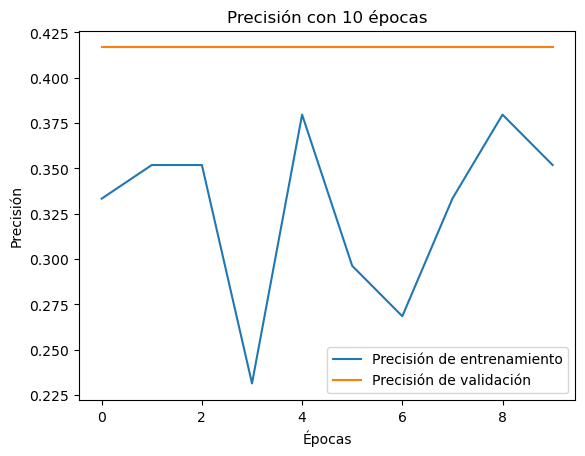

In [27]:
# Graficar la precisión con 10 épocas
plt.plot(history_10_epochs.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history_10_epochs.history['val_accuracy'], label='Precisión de validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.title('Precisión con 10 épocas')
plt.show()

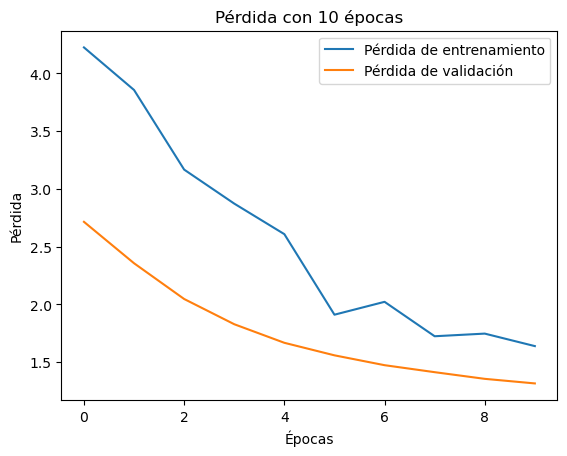

In [28]:
# Graficar la pérdida con 10 épocas
plt.plot(history_10_epochs.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history_10_epochs.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.title('Pérdida con 10 épocas')
plt.show()

# Cambiar el número de épocas a 30

In [25]:
# Entrenar el modelo durante 30 épocas
model_30_epochs = create_model()
history_30_epochs = model_30_epochs.fit(X_train, y_train, epochs=30, batch_size=5, validation_split=0.1)
# Evaluar el modelo en el conjunto de prueba
loss_30_epochs, accuracy_30_epochs = model_30_epochs.evaluate(X_test, y_test)
print(f'Precisión en el conjunto de prueba con 30 épocas: {accuracy_30_epochs * 100:.2f}%')

Epoch 1/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.3283 - loss: 3.0495 - val_accuracy: 0.4167 - val_loss: 1.8609
Epoch 2/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3455 - loss: 2.3832 - val_accuracy: 0.4167 - val_loss: 1.7063
Epoch 3/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3516 - loss: 2.6777 - val_accuracy: 0.4167 - val_loss: 1.5759
Epoch 4/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2867 - loss: 2.1271 - val_accuracy: 0.4167 - val_loss: 1.5041
Epoch 5/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2084 - loss: 2.5857 - val_accuracy: 0.4167 - val_loss: 1.4419
Epoch 6/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1331 - loss: 2.4119 - val_accuracy: 0.3333 - val_loss: 1.4011
Epoch 7/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2616 - loss: 1.6563 - val_accuracy: 0.2500 - val_loss: 1.3869
Epoch 8/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2453 - loss: 2.0453 - val_accuracy: 0.1667 - val_loss

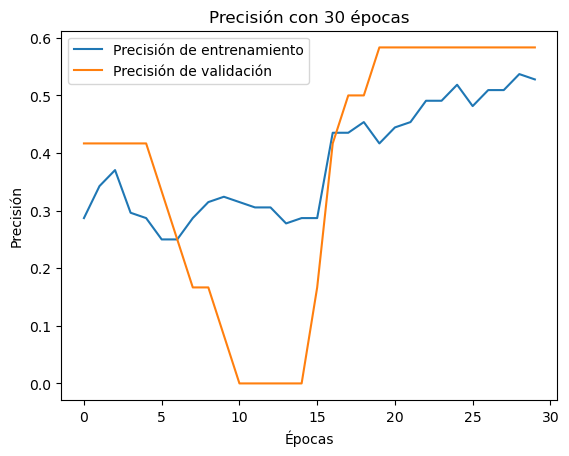

In [29]:
# Graficar la precisión con 30 épocas
plt.plot(history_30_epochs.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history_30_epochs.history['val_accuracy'], label='Precisión de validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.title('Precisión con 30 épocas')
plt.show()

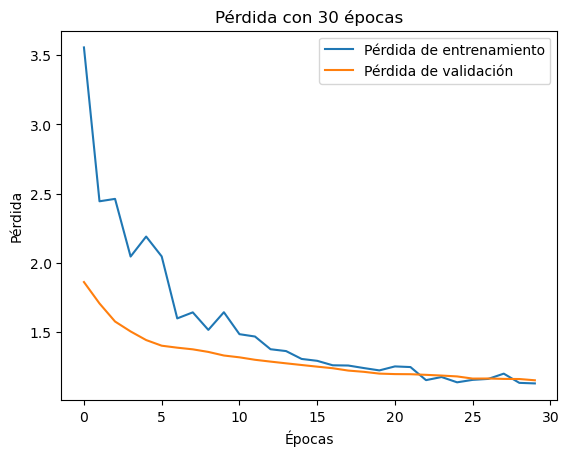

In [30]:
# Graficar la pérdida con 30 épocas
plt.plot(history_30_epochs.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history_30_epochs.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.title('Pérdida con 30 épocas')
plt.show()

# Resultados y conclusiones

Con 10 épocas, la precisión en el conjunto de prueba fue del 30 y la pérdida fue de 1.3680.

Con 30 épocas, la precisión en el conjunto de prueba aumentó al 70% y la pérdida fue de 1.1140.

La pérdida en el conjunto de prueba disminuyó de 1.3680 a 1.1140 cuando se incrementó el número de épocas de 10 a 30.
Esto indica que el modelo está mejorando su capacidad para predecir correctamente a medida que se entrena por más tiempo.

¿Cómo afecta el número de épocas a la precisión y la pérdida del modelo durante el entrenamiento y la validación? ¿Observa algún signo de sobreajuste o subajuste?

En el Entrenamiento con 10 épocas es posible que el modelo no haya tenido suficiente tiempo para aprender adecuadamente los patrones en los datos de entrenamiento, mientras que en el entrenamiento de 30 epocas, el modelo ha tenido más tiempo para aprender y ajustar sus pesos, lo que resulta en una mejor capacidad predictiva.

En el entrenamiento de 10 épocas existe una pérdida alta que indica que el modelo todavía tiene margen para mejorar su ajuste a los datos de entrenamiento y en el entrenamiento de 30 épocas la reducción en la pérdida sugiere que el modelo ha mejorado su ajuste y predicción de los datos.

Se observa que en lo 2 métodos existe el subajuste ya que existen altas perdidas tanto en entrenamiento como en validación.

# Desafio 4

# Función de Activación Sigmoid

In [5]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.regularizers import l2
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

In [6]:
# Cargar el conjunto de datos Iris
data = load_iris()
X = data.data
y = data.target

# Convertir las etiquetas a formato one-hot encoding
y = to_categorical(y)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
def create_model_sigmoid():
    model = Sequential()
    model.add(Dense(10, input_dim=4, activation='sigmoid', kernel_regularizer=l2(0.01)))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='sigmoid', kernel_regularizer=l2(0.01)))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='sigmoid', kernel_regularizer=l2(0.01)))
    model.add(Dropout(0.5))
    model.add(Dense(3, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [12]:
# Entrenar el modelo con función de activación sigmoid
model_sigmoid = create_model_sigmoid()
history_sigmoid = model_sigmoid.fit(X_train, y_train, epochs=30, batch_size=5, validation_split=0.1)

Epoch 1/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.2925 - loss: 1.6885 - val_accuracy: 0.1667 - val_loss: 1.5397
Epoch 2/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3329 - loss: 1.5027 - val_accuracy: 0.1667 - val_loss: 1.4911
Epoch 3/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2813 - loss: 1.5208 - val_accuracy: 0.1667 - val_loss: 1.4522
Epoch 4/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3562 - loss: 1.4014 - val_accuracy: 0.1667 - val_loss: 1.4283
Epoch 5/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3330 - loss: 1.3705 - val_accuracy: 0.1667 - val_loss: 1.4023
Epoch 6/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2850 - loss: 1.4664 - val_accuracy: 0.1667 - val_loss: 1.3759
Epoch 7/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3507 - loss: 1.4451 - val_accuracy: 0.1667 - val_loss: 1.3552
Epoch 8/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2884 - loss: 1.3951 - val_accuracy: 0.1667 - val_loss

In [13]:
# Evaluar el modelo en el conjunto de prueba
loss_sigmoid, accuracy_sigmoid = model_sigmoid.evaluate(X_test, y_test)
print(f'Precisión en el conjunto de prueba con activación sigmoid: {accuracy_sigmoid * 100:.2f}%')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3333 - loss: 1.1630
Precisión en el conjunto de prueba con activación sigmoid: 33.33%


# Función de Activación Tanh

In [14]:
def create_model_tanh():
    model = Sequential()
    model.add(Dense(10, input_dim=4, activation='tanh', kernel_regularizer=l2(0.01)))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='tanh', kernel_regularizer=l2(0.01)))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='tanh', kernel_regularizer=l2(0.01)))
    model.add(Dropout(0.5))
    model.add(Dense(3, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [15]:
# Entrenar el modelo con función de activación tanh
model_tanh = create_model_tanh()
history_tanh = model_tanh.fit(X_train, y_train, epochs=30, batch_size=5, validation_split=0.1)

Epoch 1/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.1516 - loss: 1.8050 - val_accuracy: 0.0833 - val_loss: 1.4565
Epoch 2/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3332 - loss: 1.6157 - val_accuracy: 0.1667 - val_loss: 1.4404
Epoch 3/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3965 - loss: 1.3934 - val_accuracy: 0.1667 - val_loss: 1.4245
Epoch 4/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4045 - loss: 1.3776 - val_accuracy: 0.1667 - val_loss: 1.3960
Epoch 5/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3766 - loss: 1.4332 - val_accuracy: 0.1667 - val_loss: 1.3673
Epoch 6/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3173 - loss: 1.5531 - val_accuracy: 0.1667 - val_loss: 1.3452
Epoch 7/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2665 - loss: 1.5508 - val_accuracy: 0.1667 - val_loss: 1.3174
Epoch 8/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3608 - loss: 1.4068 - val_accuracy: 0.1667 - val_loss

In [16]:
# Evaluar el modelo en el conjunto de prueba
loss_tanh, accuracy_tanh = model_tanh.evaluate(X_test, y_test)
print(f'Precisión en el conjunto de prueba con activación tanh: {accuracy_tanh * 100:.2f}%')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7000 - loss: 0.7171
Precisión en el conjunto de prueba con activación tanh: 70.00%


# Resultados y conclusiones

Con la activación sigmoid, la precisión en el conjunto de prueba es del 33.33% y la pérdida en el conjunto de prueba es de 1.1630.

Con la activación tanh, la precisión en el conjunto de prueba es del 70.00% y la pérdida en el conjunto de prueba es de 0.7171.

¿Cómo afectan las diferentes funciones de activación en las capas ocultas a la precisión y la pérdida del modelo durante el entrenamiento y la validación?

En cuanto a la precisión, la función Sigmoid produce una salida en el rango (0, 1), lo que puede ser útil para problemas de clasificación binaria. Sin embargo, en problemas de clasificación multiclase como el conjunto de datos de Iris, puede llevar a problemas de saturación de gradientes, especialmente en capas más profundas. Esto puede resultar en una convergencia más lenta y posiblemente en un rendimiento inferior en términos de precisión.

La función Tanh produce una salida en el rango (-1, 1), pero es simétrica alrededor de cero, lo que puede ayudar a evitar algunos problemas de saturación de gradientes. En comparación con sigmoid, tanh puede conducir a una convergencia más rápida y, en algunos casos, a una mejor precisión.

En cuanto a la pérdida, La función de activación sigmoid puede contribuir a un problema conocido como "desvanecimiento del gradiente", especialmente en capas más profundas. Esto puede hacer que la convergencia sea más lenta y provocar que el modelo se quede atascado en mínimos locales subóptimos. En consecuencia, la pérdida en el conjunto de validación puede ser relativamente alta.

Al igual que con sigmoid, tanh puede experimentar el problema del "desvanecimiento del gradiente", pero en menor medida debido a su simetría alrededor de cero. Esto puede resultar en una pérdida más baja tanto en el conjunto de entrenamiento como en el de validación en comparación con sigmoid.
